# Notebook dedicated to getting water mask using isce and mintpy
- https://github.com/insarlab/MintPy-tutorial/blob/main/applications/water_mask.ipynb

In [2]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from mintpy.cli import view

In [4]:
os.chdir('/home/wcc/SabineRS_InSAR')

In [7]:
!/home/wcc/tools/miniforge/envs/mintpy/lib/python3.8/site-packages/isce/applications/wbd.py 29.825157 30.308874 -93.547211 -93.126984

Using default ISCE Path: /home/wcc/tools/miniforge/envs/isce/lib/python3.8/site-packages/isce
command = curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O https://e4ftl01.cr.usgs.gov/MEASURES/SRTMSWBD.003/2000.02.11/N30W094.SRTMSWBD.raw.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 51523  100 51523    0     0  92724      0 --:--:-- --:--:-- --:--:-- 92834
command = curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O https://e4ftl01.cr.usgs.gov/MEASURES/SRTMSWBD.003/2000.02.11/N29W094.SRTMSWBD.raw.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67401  100 67401    0     0   128k      0 --:--:-- --:--:-- --:--:--  128k
API open (R): swbdLat_N29_N31_Lon_W094_W093.wbd
API close:  swbdLat_N29_N31_Lon_W094_W093.wbd


view.py swbdLat_N29_N31_Lon_W094_W093.wbd -c gray --noverbose


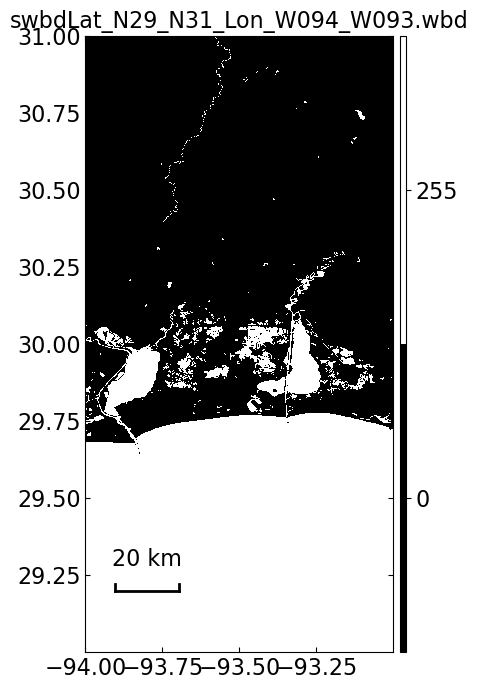

In [16]:
wbd_file = [f for f in os.listdir(os.getcwd()) if f.endswith('.wbd')][0]
view.main(f'{wbd_file} -c gray --noverbose'.split())

In [25]:


# 2. Convert to radar coordinates
# This will radar-code the downloaded swbdLat_S01_N00_Lon_W092_W091.wbd into waterBody.h5 file.
# The no-data pixels will be filled with value of 255 (as water body)
!geocode.py $wbd_file --lat-file /home/wcc/SabineRS_InSAR/interferometry/work/merged/lat.rdr.xml --lon-file /home/wcc/SabineRS_InSAR/interferometry/work/merged/lon.rdr.xml --geo2radar --fill 255
# view.main('waterBody.rdr -c gray --flip-lr --noverbose'.split())



No lookup table (longitude or rangeCoord) found in files.
Traceback (most recent call last):
  File "/home/wcc/tools/miniforge/envs/mintpy/bin/geocode.py", line 10, in <module>
    sys.exit(main())
  File "/home/wcc/tools/miniforge/envs/mintpy/lib/python3.8/site-packages/mintpy/cli/geocode.py", line 258, in main
    inps = cmd_line_parse(iargs)
  File "/home/wcc/tools/miniforge/envs/mintpy/lib/python3.8/site-packages/mintpy/cli/geocode.py", line 140, in cmd_line_parse
    raise FileNotFoundError('No lookup table found! Can not geocode without it.')
FileNotFoundError: No lookup table found! Can not geocode without it.


In [ ]:
# 3. Adjust value for MintPy: 0 for water and 1 for land
# This will generate waterMask.h5 from waterBody.h5 file.
!generate_mask.py waterBody.rdr --max 0.5 -o waterMask.rdr
view.main('waterMask.rdr -c gray --flip-lr --noverbose'.split())